# 빅콘테스트 - NSSHOP+

## Vision  
판매실적 예측을 통한 편성 최적화 방안(모형) 도출

## Mission  
1. 편성데이터(NS홈쇼핑) 를 활용하여 방송편성표에 따른 판매실적을 예측  
2. 최적 수익을 고려한 요일별/ 시간대별 / 카테고리별 편성 최적화 방안(모형) 제시


기본 정보 1 - 취급액 = 판매단가 * 주문량 (취소, 반품 제외)  
기본 정보 2 - ~19년 10월 : 06:00 ~ 익일 02:00   
기본 정보 3 - 19년 11월~ : 06:20 ~ 익일 02:20  
기본 정보 4 - 예측 기간인 20년 6월 편성표는 월~토 06:20 ~ 02:20(익일), 일요일은 06:20 ~ 02:00로 구성 (심야시간대 제외) <-- ?  
기본 정보 5 - 편성 시간 : 10분 ~ 60분  
  
추정 제외 사항 1 - 토요일 18:00~18:20(+-20) ※ 정보방송시간  
추정 제외 사항 2 - 판매단가 = 0 (무형) 상품  
  
참고사항 1 - 1월 1일 = 화요일  

## 데이터 전처리  
1. 실적 데이터 (방송일시 DATETIME, 노출 FILLNA)
2. 시청률 데이터 
3. 예측 데이터 (방송일시 DATETIME, 노출 FILLNA)

In [63]:
import pandas as pd
performance_df = pd.read_csv(r'datas\train_data\performance.csv')

In [64]:
from BIGCON import DataProcessing
# DATETIME으로 변경
performance_df = DataProcessing.date_change(performance_df, '방송일시')
# 노출시간 채우기, 형변환 (int)
performance_df['노출(분)'].fillna(method='pad', inplace=True)
# performance_df['노출(분)'] = performance_df['노출(분)'].astype(int)

In [65]:
# 날짜 그룹화
import datetime
START_DATE = datetime.datetime(2019, 1, 1, 4)
def change_index(x):
    a = x - START_DATE
    return a.days
performance_df['DAY'] = performance_df['방송일시'].apply(change_index)

In [66]:
# 취급액 Null 0 채우기, 형변환 (int)
performance_df['취급액'].fillna(0, inplace=True)
performance_df['취급액'] = performance_df['취급액'].astype(int)

In [67]:
import matplotlib.pyplot as plt
# plt.plot(performance_df.groupby('DAY').sum()['취급액'])
# performance_df.groupby('DAY').sum()

In [4]:
import pandas as pd

In [18]:
watch_rating_df = pd.read_csv(r'datas\train_data\view_rating.csv')

In [20]:
# 평균 로우, 칼럼 제거
# 시간대 Index화 (시간으로 변경 필요하지 않나?)
watch_rating_df.drop(len(watch_rating_df)-1, axis=0, inplace=True)
watch_rating_df.drop(watch_rating_df.columns[-1], axis=1, inplace=True)
watch_rating_df.set_index('시간대', inplace=True)

In [21]:
watch_rating_df

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
시간대,,,,,,,,,,,,,,,,,,,,,
02:00,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.000,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000
02:01,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.005,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.012
02:02,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.005,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000
02:03,0.0,0.0,0.014,0.0,0.000,0.0,0.0,0.0,0.000,0.005,...,0.0,0.000,0.000,0.017,0.0,0.000,0.0,0.0,0.000,0.000
02:04,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.005,...,0.0,0.000,0.000,0.017,0.0,0.000,0.0,0.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01:55,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.004,0.000,...,0.0,0.013,0.000,0.000,0.0,0.015,0.0,0.0,0.000,0.000
01:56,0.0,0.0,0.000,0.0,0.027,0.0,0.0,0.0,0.000,0.000,...,0.0,0.013,0.000,0.000,0.0,0.015,0.0,0.0,0.000,0.000
01:57,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.004,0.000,...,0.0,0.013,0.000,0.000,0.0,0.015,0.0,0.0,0.000,0.000


## LSTM 취급액 예측
(Time Sequence = 7 days)

In [75]:
# LSTM 데이터로 정제
import numpy as np
# 타임스텝
ts = 7

lstm_df = performance_df.groupby('DAY').sum()
per_mean, per_std = lstm_df.describe()['취급액'][['mean','std']]

# Normalization
lstm_df['취급액'] = lstm_df['취급액'].map(lambda x : (x - per_mean) / per_std)
X_train = np.asarray([np.array([lstm_df['취급액'].values[i+j] for j in range(ts)])
                      for i in range(len(lstm_df['취급액']) - ts)]).reshape(-1,ts,1)[:-1]
y_train = lstm_df['취급액'].values[ts:-1]
X_train.shape, y_train.shape

((357, 7, 1), (357,))

In [76]:
# 모델 쌓기
from keras.models import Sequential
from keras.layers import LSTM, Dense

model_LSTM = Sequential()
model_LSTM.add(LSTM(100, input_shape=(ts, 1)))
model_LSTM.add(Dense(1, activation="linear"))
model_LSTM.compile(loss='mse', optimizer='adam')

model_LSTM.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


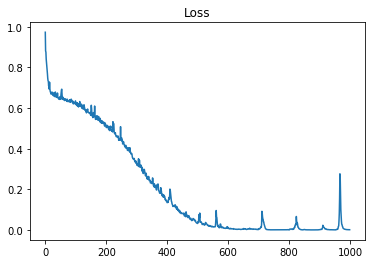

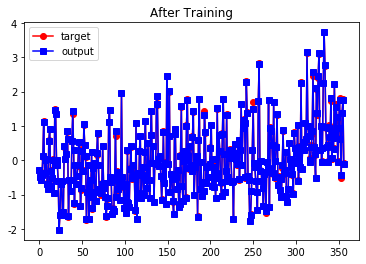

In [77]:
# 시각화
import matplotlib.pyplot as plt

history_LSTM = model_LSTM.fit(X_train, y_train, epochs=1000,verbose=0)
# Loss Graph
plt.plot(history_LSTM.history["loss"])
plt.title("Loss")
plt.show()
# 예측, 실제 값
plt.plot(y_train[:], 'ro-', label="target")
plt.plot(model_LSTM.predict(X_train[:, :, :]), 'bs-', label="output")
plt.legend()
plt.title("After Training")
plt.show()

In [78]:
y_values = model_LSTM.predict(X_train)[-7:]
new_value = model_LSTM.predict(y_values.reshape(-1,ts,1))

In [79]:
# 예측 기간까지 연속 예측
new_datas = []
end_date = datetime.date(2020,6,30)
start_date = datetime.date(2020,1,1)
now_date = start_date
temp = []
for i in range((end_date - start_date).days):
    now_date += datetime.timedelta(days=1)
    if i == 0:
        new_values = np.vstack((y_values,new_value))[-7:]
    else:
        new_values = np.vstack((new_values,new_value))[-7:]
    new_value = model_LSTM.predict(new_values.reshape(-1,ts,1))
    new_datas.append(new_value)

    if now_date >= datetime.date(2020,6,1):
        temp.append(new_value[0][0])


2020-06-01
2020-06-02
2020-06-03
2020-06-04
2020-06-05
2020-06-06
2020-06-07
2020-06-08
2020-06-09
2020-06-10
2020-06-11
2020-06-12
2020-06-13
2020-06-14
2020-06-15
2020-06-16
2020-06-17
2020-06-18
2020-06-19
2020-06-20
2020-06-21
2020-06-22
2020-06-23
2020-06-24
2020-06-25
2020-06-26
2020-06-27
2020-06-28
2020-06-29
2020-06-30


In [81]:
temp = list(map(lambda i : i * per_std + per_mean, temp))

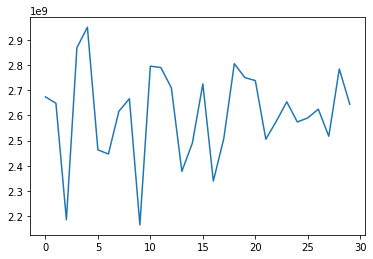

In [83]:
plt.plot(temp)

In [86]:
y_train = list(map(lambda i : i * per_std + per_mean, y_train))

In [89]:
y_train.extend(temp)

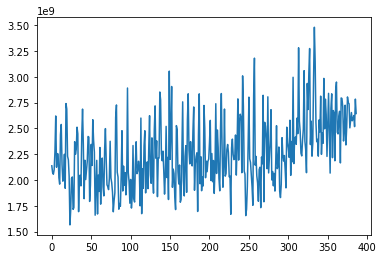

In [92]:
plt.plot(y_train)

## TV 프로그램 토큰
1. EBS
2. 홈&쇼핑
3. 현대홈쇼핑
4. JTBC

In [97]:
pd.read_json(r'final_datas\tv_program.json')

,time,tokens,category
0,2019-01-01 05:00,"[왕초보, 영어, 너의, 새해, 결심은, 뭐니]",None
1,2019-01-01 05:30,"[세계견문록, 아틀라스, 자연의, 서호주]",None
2,2019-01-01 06:00,"[한국기행, 전주재방, 국수기행, 그릇, 바다의]",None
3,2019-01-01 06:20,"[세계테마기행, 영혼의, 팔레트, 과테말라, 모험가의, 낙원]",None
4,2019-01-01 07:00,"[강철소방대, 파이어로보, 종합, 위기일발, 메가시티]",None
...,...,...,...
49913,2019-12-31 18:20,"[시각, 뉴스룸]",None
49914,2019-12-31 18:25,"[아는, 형님, 형님학교, 종업식, 해를, 돌아보는, 시간, 형님학교, 종업식, 티...",None
49915,2019-12-31 19:55,"[뉴스룸, 사실, 공정, 균형, 품위, 한걸음, 들어가는, 뉴스, 뉴스룸은, 뉴스가...",None
49916,2019-12-31 21:30,"[연말, 특선]",None


## 11번가 상품 토큰
1. 트렌드, 이슈 분석

In [106]:
pd.read_json(r'final_datas\11st_tokens.json')

,type,tokens
0,브랜드패션,"[쉬즈미스, 리스트, 프리어텀, 라스트썸머]"
1,브랜드패션,"[크로커다일레이디, 올리비아하슬러, 샤트렌, 여름, 시즌오프, 가을신상, 여성, 간..."
2,브랜드패션,"[쿠폰, 긴급찬스, 홈쇼핑, 유명브랜드를, 모아, 역시즌, 썸머, 클리어런스]"
3,브랜드패션,"[올리비에스클로젯외, 필수아이템, 소장각, 원피스, 블라우스]"
4,브랜드패션,"[샐리, 티뷰, 가을간절기신상, 여름, 린넨, 원피스, 블라우스]"
...,...,...
35995,해외직구,"[블루투스, 무선, 이어폰]"
35996,해외직구,"[구글, 크롬캐스트, 울트라, 미국정품]"
35997,해외직구,"[가지, 판도라박스, 레트로게임기, 분리형, 일체형, 한글판, 보글보글, 오락실, ..."
35998,해외직구,"[차쉬넬, 골프거리, 레이저, 측정기, 배터리, 포함]"


## 기상 데이터
1. 지역 별 기상 데이터

In [107]:
pd.read_json(r'datas\temp_data\weather_percen.json')

,time,loc,tem,hum,rain,snow,popul,percen
0,2019-01-01 00:00,속초,-2.5,20,0.0,0.0,78618.0,2.482000e-07
1,2019-01-01 01:00,속초,-1.9,18,0.0,0.0,78618.0,2.482000e-07
2,2019-01-01 02:00,속초,-2.2,17,0.0,0.0,78618.0,2.482000e-07
3,2019-01-01 03:00,속초,-2.5,18,0.0,0.0,78618.0,2.482000e-07
4,2019-01-01 04:00,속초,-3.9,20,0.0,0.0,78618.0,2.482000e-07
...,...,...,...,...,...,...,...,...
823435,2019-12-31 20:00,부안,-3.6,68,0.0,0.0,26409.0,8.340000e-08
823436,2019-12-31 21:00,부안,-3.9,61,0.0,0.0,26409.0,8.340000e-08
823437,2019-12-31 22:00,부안,-4.6,73,0.0,0.0,26409.0,8.340000e-08
823438,2019-12-31 23:00,부안,-5.1,64,0.0,0.0,26409.0,8.340000e-08


## 최종 모델링
Feature List (기본 + LSTM으로 예측한 취급액, 상품토큰, 주변 TV 프로그램, 날씨, 시청률)

### 1. 학습

In [101]:
# 카테고리 피쳐화, 굳이 이렇게 해야되나
c_feature = perform_df['상품군'].unique()

for c in c_feature:
    perform_df[c] = 0 

category = list(perform_df['상품군'])

for i,c in enumerate(category):
    perform_df[c][i] = 1

NameError: name 'perform_df' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_datas, y_datas, test_size=0.2, shuffle=True)

In [ ]:
# Normalization
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

# 딥러닝 모델링

def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[15]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()
model.summary()

In [ ]:
history = model.fit(
  X_train, y_train,
  epochs=1000, validation_split = 0.2, verbose=0)

In [ ]:
pred = model.predict(X_train)

In [ ]:
# MSE
np.mean((y_train-pred)**2)

In [ ]:
plt.plot(y_train[:200])
plt.plot(pred[:200])
plt.show()

In [ ]:
# 검증 데이터 오차분포 (Scatter)

test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [Sell]')
plt.ylabel('Predictions [Sell]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [ ]:
# 검증 데이터 오차분포 (Bar)

error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [ ]:
# 참고용

# 피처 튜닝
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


model = keras.Sequential([
    keras.layers.Layer(input_shape=(X_train.shape)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



model.fit(X_train, y_train, epochs=5)



test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\n테스트 정확도:', test_acc)

### 2. 평가

## Final - 프로그램 편성표 최적화 모델
### PP(매출액) - MPS(카테고리 분류, 상품) - MRP(시간대)